## Data 621 Homework 1

* Author: Jordan Glendrange
* Date: 2022-3-6

## DATA EXPLORATION



In [1]:
import pandas as pd

In [35]:
df_test = pd.read_csv('moneyball-evaluation-data.csv')
df = pd.read_csv('moneyball-training-data.csv')
df.head()

,INDEX,TARGET_WINS,TEAM_BATTING_H,TEAM_BATTING_2B,TEAM_BATTING_3B,TEAM_BATTING_HR,TEAM_BATTING_BB,TEAM_BATTING_SO,TEAM_BASERUN_SB,TEAM_BASERUN_CS,TEAM_BATTING_HBP,TEAM_PITCHING_H,TEAM_PITCHING_HR,TEAM_PITCHING_BB,TEAM_PITCHING_SO,TEAM_FIELDING_E,TEAM_FIELDING_DP
0,1,39,1445,194,39,13,143,842.0,NaN,NaN,NaN,9364,84,927,5456.0,1011,NaN
1,2,70,1339,219,22,190,685,1075.0,37.0,28.0,NaN,1347,191,689,1082.0,193,155.0
2,3,86,1377,232,35,137,602,917.0,46.0,27.0,NaN,1377,137,602,917.0,175,153.0
3,4,70,1387,209,38,96,451,922.0,43.0,30.0,NaN,1396,97,454,928.0,164,156.0
4,5,82,1297,186,27,102,472,920.0,49.0,39.0,NaN,1297,102,472,920.0,138,168.0


I like using the shape function to understand what the dimensions are for the data set. This is normally the first thing I do.

In [36]:
print(df.shape)

(2276, 17)


Describe function gives us relevant stats across all columns

In [37]:
print(df.describe())

             INDEX  TARGET_WINS  TEAM_BATTING_H  TEAM_BATTING_2B  \
count  2276.000000  2276.000000     2276.000000      2276.000000   
mean   1268.463533    80.790861     1469.269772       241.246924   
std     736.349040    15.752152      144.591195        46.801415   
min       1.000000     0.000000      891.000000        69.000000   
25%     630.750000    71.000000     1383.000000       208.000000   
50%    1270.500000    82.000000     1454.000000       238.000000   
75%    1915.500000    92.000000     1537.250000       273.000000   
max    2535.000000   146.000000     2554.000000       458.000000   

       TEAM_BATTING_3B  TEAM_BATTING_HR  TEAM_BATTING_BB  TEAM_BATTING_SO  \
count      2276.000000      2276.000000      2276.000000      2174.000000   
mean         55.250000        99.612039       501.558875       735.605336   
std          27.938557        60.546872       122.670862       248.526418   
min           0.000000         0.000000         0.000000         0.000000   
25

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

Below is a correlation matrix. This is useful to understand how each column is correlated with each other. The variable with the highest correlation is team hits by batter.

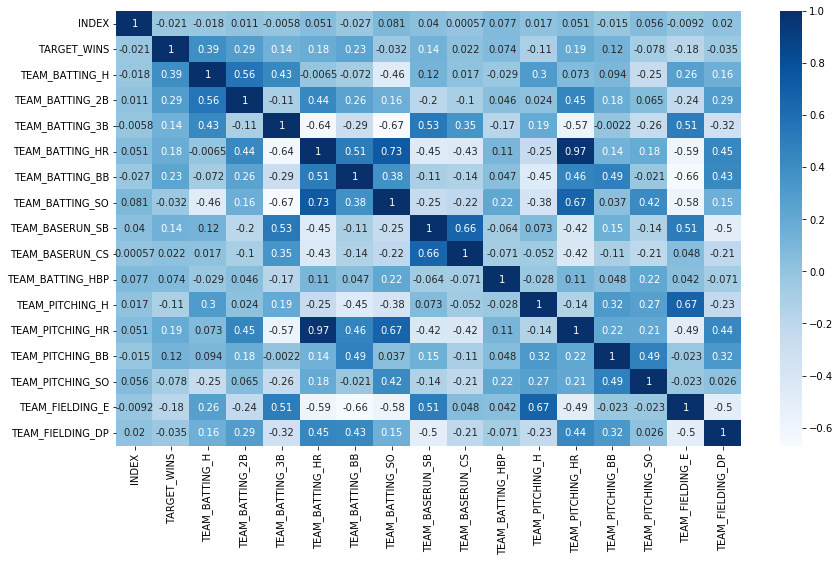

In [39]:
plt.figure(figsize=(14,8))
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues")

## DATA PREPARATION

First we are going to drop the index column. Pandas already has its own index. This column won't add anything to our model.

In [40]:
df.drop('INDEX', axis=1, inplace=True)

Next we want to understand how many missing values we have in our dataset

In [41]:
df.isna().sum()

TARGET_WINS            0
TEAM_BATTING_H         0
TEAM_BATTING_2B        0
TEAM_BATTING_3B        0
TEAM_BATTING_HR        0
TEAM_BATTING_BB        0
TEAM_BATTING_SO      102
TEAM_BASERUN_SB      131
TEAM_BASERUN_CS      772
TEAM_BATTING_HBP    2085
TEAM_PITCHING_H        0
TEAM_PITCHING_HR       0
TEAM_PITCHING_BB       0
TEAM_PITCHING_SO     102
TEAM_FIELDING_E        0
TEAM_FIELDING_DP     286
dtype: int64

TEAM_BATTING_HBP has more missing than valid values. I am going to remove the column and for the other missing values will replace with average

In [42]:
df.drop('TEAM_BATTING_HBP', axis=1, inplace=True)

In [43]:
df = df.fillna(df.mean())

In [44]:
df.isna().sum()

TARGET_WINS         0
TEAM_BATTING_H      0
TEAM_BATTING_2B     0
TEAM_BATTING_3B     0
TEAM_BATTING_HR     0
TEAM_BATTING_BB     0
TEAM_BATTING_SO     0
TEAM_BASERUN_SB     0
TEAM_BASERUN_CS     0
TEAM_PITCHING_H     0
TEAM_PITCHING_HR    0
TEAM_PITCHING_BB    0
TEAM_PITCHING_SO    0
TEAM_FIELDING_E     0
TEAM_FIELDING_DP    0
dtype: int64

## BUILD MODELS

In [62]:
import statsmodels.api as sm
from scipy import stats

For our first model I am going to include all the variables and see what the output gives us. We have an adjusted R-squared of 0.315, which we want to be higher ideally. 

In [63]:
result = sm.ols(formula="TARGET_WINS~\
    TEAM_BATTING_H+TEAM_BATTING_2B+TEAM_BATTING_3B+\
    TEAM_BATTING_HR+TEAM_BATTING_BB+TEAM_BATTING_SO+\
    TEAM_BASERUN_SB+TEAM_BASERUN_CS+TEAM_PITCHING_H+\
    TEAM_PITCHING_HR+TEAM_PITCHING_BB+TEAM_PITCHING_SO+\
    TEAM_FIELDING_E+TEAM_FIELDING_DP", data=df).fit()

AttributeError: module 'statsmodels.api' has no attribute 'ols'

In [64]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            TARGET_WINS   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     75.63
Date:                Sun, 06 Mar 2022   Prob (F-statistic):          8.14e-177
Time:                        19:43:19   Log-Likelihood:                -9066.8
No. Observations:                2276   AIC:                         1.816e+04
Df Residuals:                    2261   BIC:                         1.825e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           25.0195      5.397  

For the next model I am going to only choose a few variables based on the correlation matrix from earlier. I am choosing values that are the most correlated with wins. I think the previous model performs better due to a higher R-squared value.

In [52]:
result2 = sm.ols(formula="TARGET_WINS~TEAM_BATTING_H+TEAM_BATTING_BB+TEAM_PITCHING_HR", data=df).fit()

In [54]:
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:            TARGET_WINS   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     215.4
Date:                Sun, 06 Mar 2022   Prob (F-statistic):          5.93e-123
Time:                        19:31:42   Log-Likelihood:                -9219.1
No. Observations:                2276   AIC:                         1.845e+04
Df Residuals:                    2272   BIC:                         1.847e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3587      3.321  

For the final approach I will take my first model, with all the values, and remove any coefficients that are not statistically significant. In the end our R-squared is the same, but this model performs the best since there isnt as much noise from other coefficients

In [55]:
result3 = sm.ols(formula="TARGET_WINS~\
    TEAM_BATTING_H+TEAM_BATTING_2B+TEAM_BATTING_3B+\
    TEAM_BATTING_HR+TEAM_BATTING_BB+TEAM_BATTING_SO+\
    TEAM_BASERUN_SB+TEAM_PITCHING_H+\
    TEAM_PITCHING_SO+\
    TEAM_FIELDING_E+TEAM_FIELDING_DP", data=df).fit()

In [56]:
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:            TARGET_WINS   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     96.25
Date:                Sun, 06 Mar 2022   Prob (F-statistic):          1.53e-179
Time:                        19:36:52   Log-Likelihood:                -9067.3
No. Observations:                2276   AIC:                         1.816e+04
Df Residuals:                    2264   BIC:                         1.823e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           23.6667      5.222  

## SELECT MODEL

The model we are going to select is result3. The adjusted R-squared was the highest with the fewest number of variables used. Now we need to see if these results are valid by checking the residuals

The qq plot is linear and the histogram is a normal distribution, which informs us that the linear model is valid

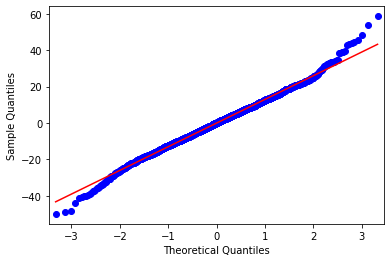

In [65]:
sm.qqplot(result3.resid, line='s');

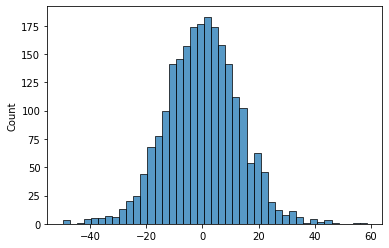

In [67]:
sns.histplot(result3.resid)